Let us start by importing the required libraries


In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Understanding the structure of the data

In [3]:
# Read the data
df = pd.read_csv('C:\\Users\\Vedalie Goudou\\Desktop\\Applied Data Science\\Project 1\\foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Question 1: How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Get number of rows and columns
number_lines = df.shape[0]
number_columns = df.shape[1]

# Show the results
print("Number of lines:", number_lines)
print("Number of columns:", number_columns)

Number of lines: 1898
Number of columns: 9


Observation : The data set has 1898 lines and 9 columns.

Question 2: What are the datatypes of the different columns in the dataset? [0.5 mark]¶

In [8]:
# The datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observation : We have three datatypes in the dataset : int64; object; float64

Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 Mark]

In [97]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
Revenue                  0
total_time               0
dtype: int64

Observation : In the dataset we don't have missing value

Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]¶

In [22]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Observation : Once is an order is placed, the mininum, average and maximun time it takes for food to be prepared are : min=20 mns; max=35 mns, mean=27,371970 mns

Question 5: How many orders are not rated? [1 mark]

In [23]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Exploratory Data Analysis (EDA)

Univariate Analysis

Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Order ID

In [24]:
# check unique order ID
df['order_id'].nunique()  

1898

Customer ID

In [25]:
# check unique customer ID
df['customer_id'].nunique()

1200

Restaurant name

In [26]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

Cuisine type

In [27]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

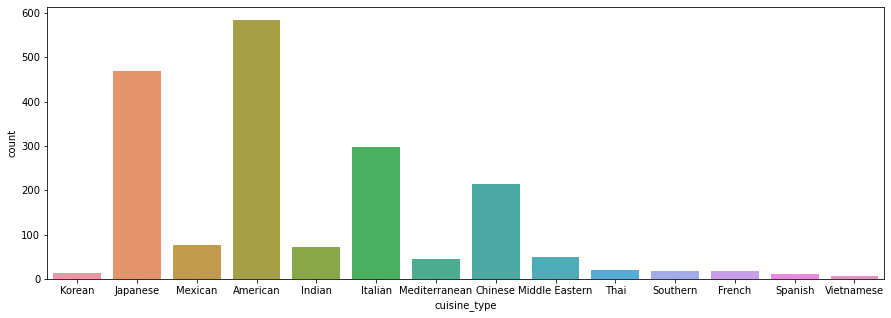

In [28]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') 

Cost of the order

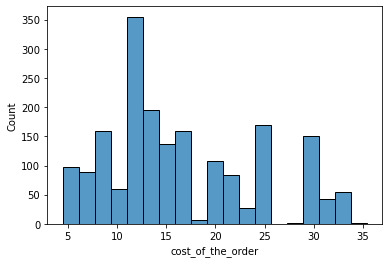

In [104]:
# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()
 

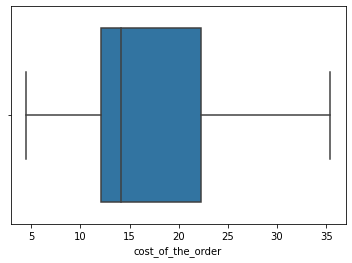

In [105]:
# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()

Day of the week

In [30]:
# # Check the unique values
df['day_of_the_week'].nunique()

2

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

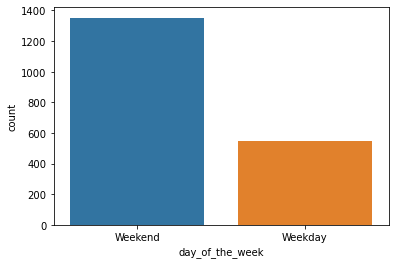

In [31]:
sns.countplot(data = df, x = 'day_of_the_week') 

Rating

In [32]:
# Check the unique values
df['rating'].nunique()

4

<AxesSubplot:xlabel='rating', ylabel='count'>

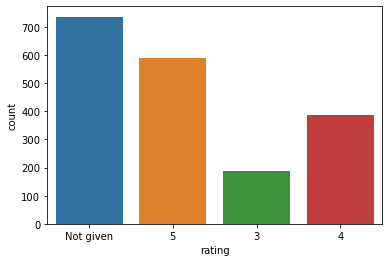

In [33]:
sns.countplot(data = df, x = 'rating') 

Food Preparation time

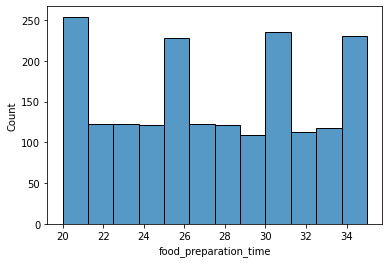

In [98]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()


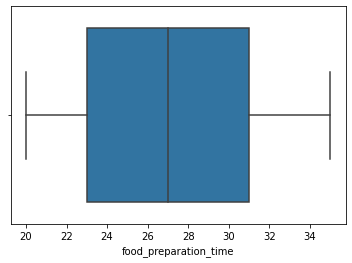

In [99]:
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

Delivery time

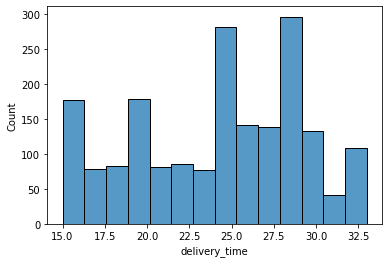

In [100]:
sns.histplot(data=df,x='delivery_time')
plt.show()


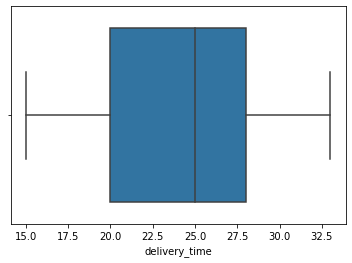

In [101]:
sns.boxplot(data=df,x='delivery_time')  
plt.show()

Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [38]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Observation : Shake Shack, The meatball shop, Blue ribbon sushi, Blue Ribbon Fried Chicken, Parm are the top 5 restaurants with highest number of orders.

Question 8: Which is the most popular cuisine on weekends? [1 mark]

In [126]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = df_weekend['cuisine_type'].value_counts().idxmax()
print('The most popular cuisine on weekends is:', most_popular_cuisine)

The most popular cuisine on weekends is: American


Observation : American is the most popular cuisine on weekends

Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]

In [127]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])



The number of total orders that cost above 20 dollars is: 555


Observation: 555 orders cost more than 20 dollars.

In [129]:
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


Observation : 29,24% of orders cost more than 20 dollars

Question 10: What is the mean order delivery time? [1 mark]

In [43]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


Observation : Average delivery time is 24.16 minutes

Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [44]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(3)  

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

Observation : The customers with the id : 52832, 47440, 83287 are the most frequent customers

Multivariate Analysis

Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]¶

Cuisine vs Cost of the order

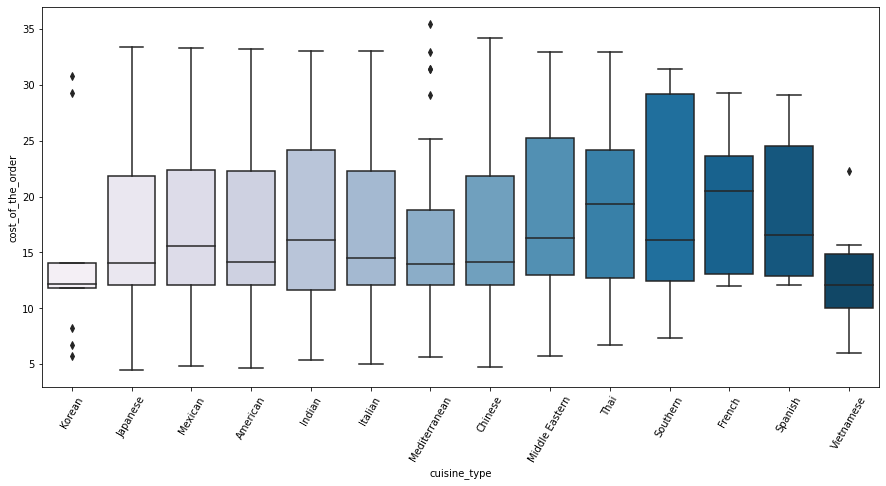

In [45]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Cuisine vs Food Preparation time

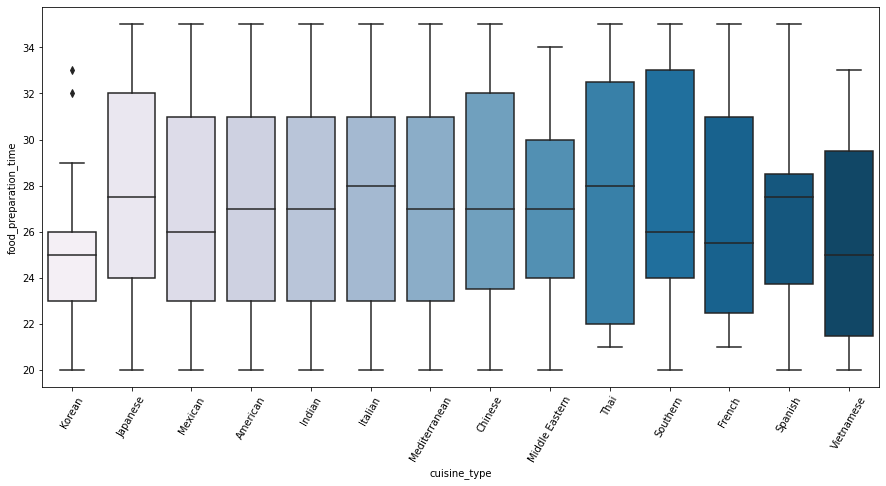

In [53]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu') 
plt.xticks(rotation = 60)
plt.show()

Day of the Week vs Delivery time

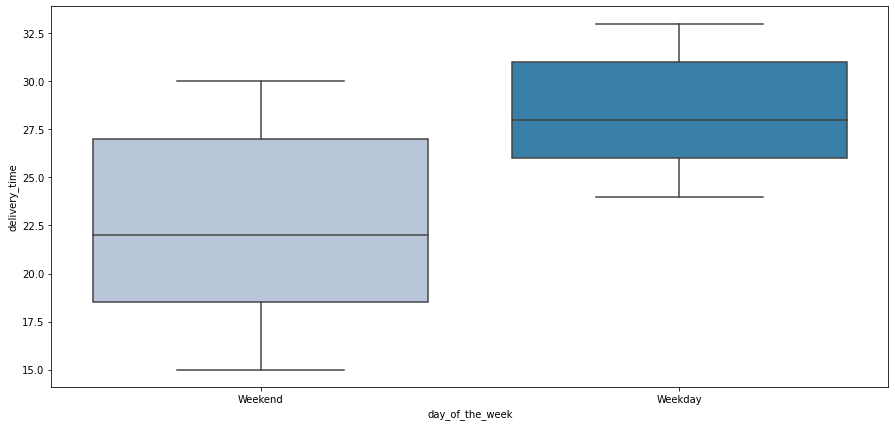

In [55]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  
plt.show()

Run the below code and write your observations on the revenue generated by the restaurants.

In [56]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Rating vs Delivery time

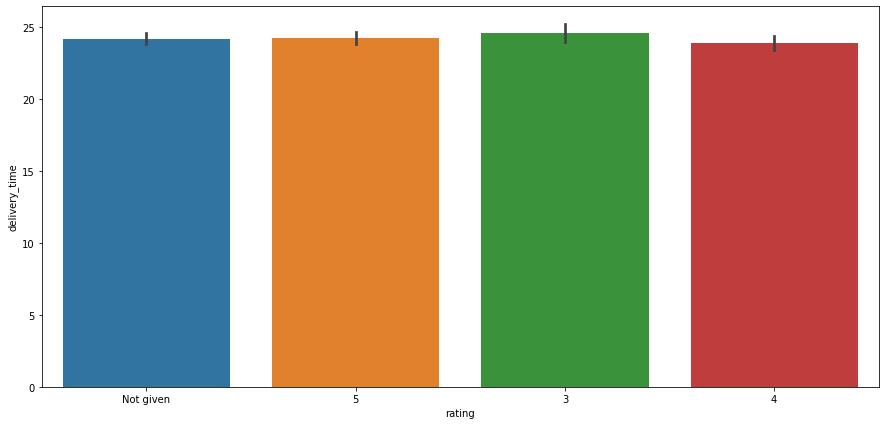

In [112]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.barplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

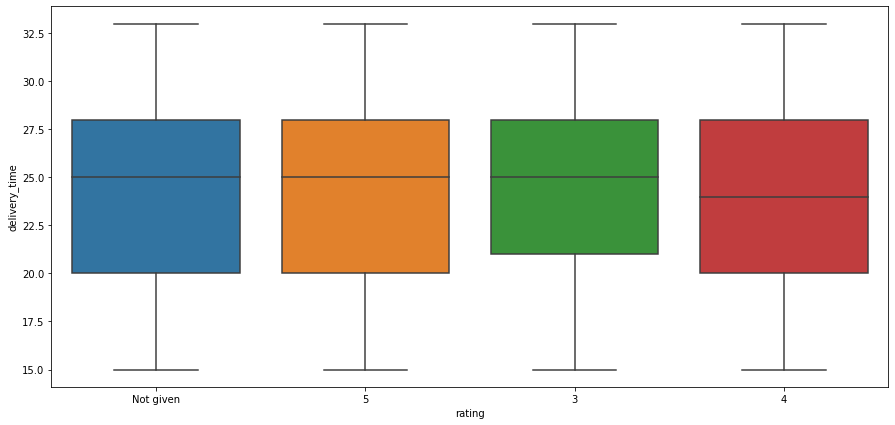

In [113]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Rating vs Food preparation time

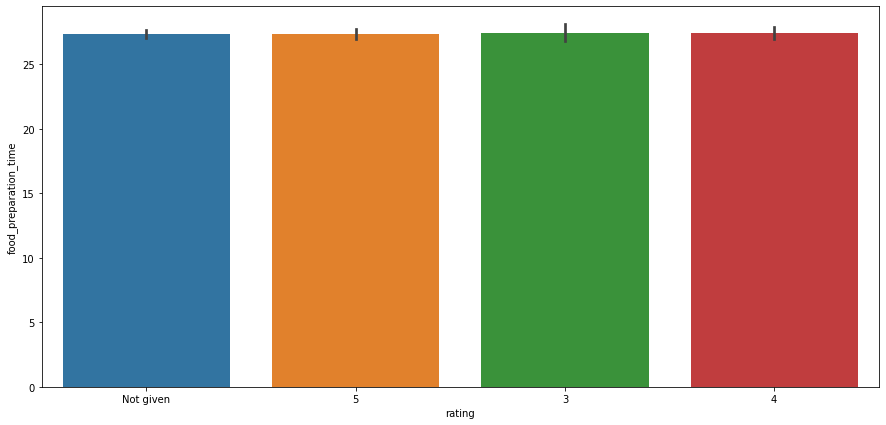

In [107]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.barplot(x = 'rating', y = 'food_preparation_time', data = df)  
plt.show()

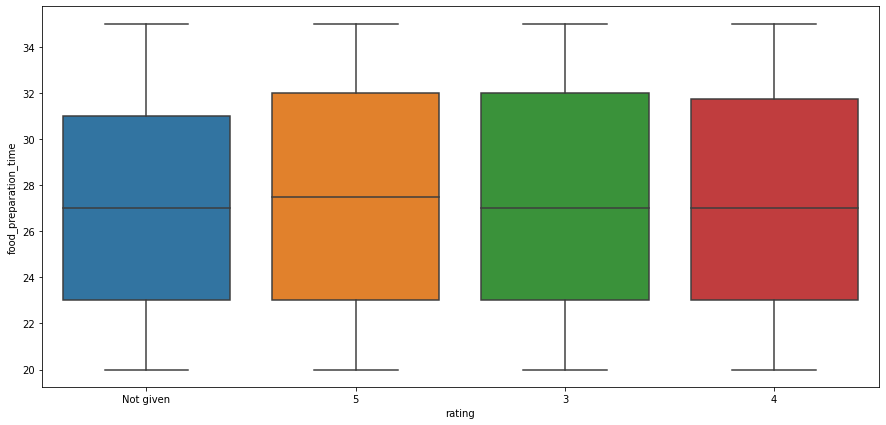

In [108]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df)  
plt.show()

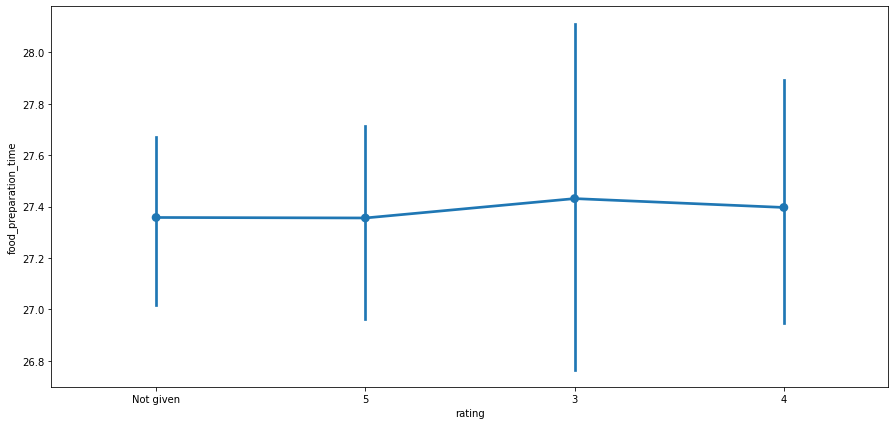

In [109]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  
plt.show()

Rating vs Cost of the order

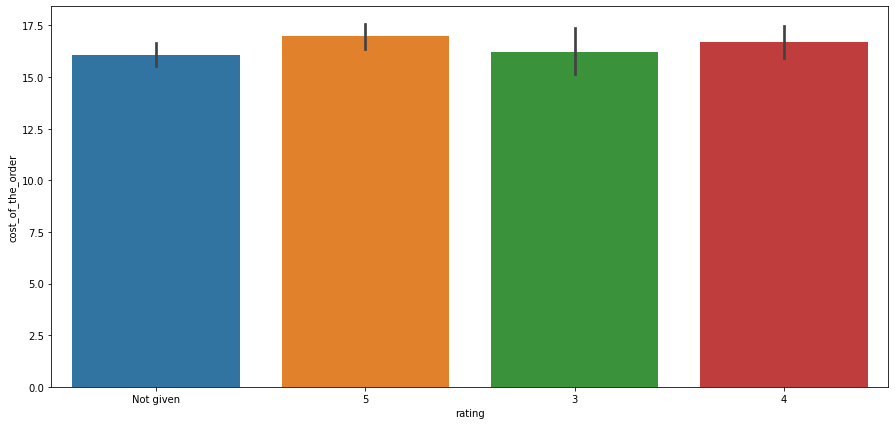

In [114]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.barplot(x = 'rating', y = 'cost_of_the_order', data = df)   
plt.show()

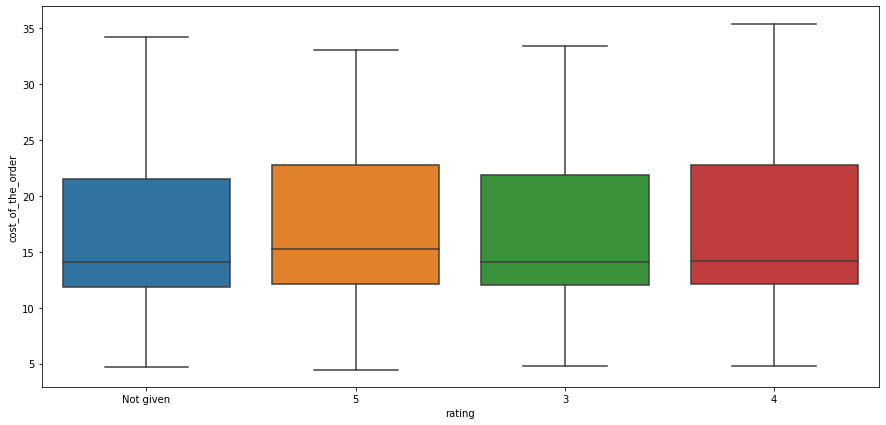

In [115]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)   
plt.show()

Correlation among variables

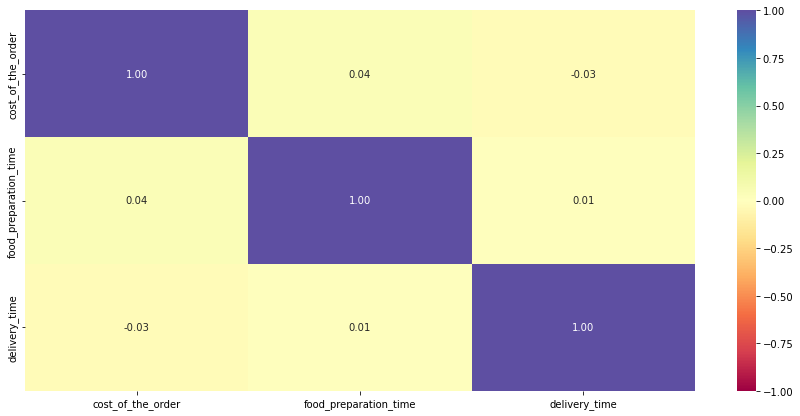

In [60]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [61]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [106]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count.head(4)['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


Observation : The meatball shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi will get the promotion offer.

Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [64]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [65]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


Observation : The company has a revenue of 6166.3 dollars

Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [118]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Get orders that have more than 60 minutes
df_greater_than_60 = df[df['total_time']>60] 

# Calculate the number of total orders that have more than 60 minutes of total delivery time
print('The number of total orders that have more than 60 minutes is:', df_greater_than_60.shape[0])


The number of total orders that have more than 60 minutes is: 200


Observation : 200 orders take more than 60 minutes for the total delivery

In [119]:
# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time 
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("percentage of orders that have more than 60 minutes of total delivery time", round(percentage, 2), '%')

percentage of orders that have more than 60 minutes of total delivery time 10.54 %


10.54% of the orders take more than 60 minutes for the total delivery

Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]¶

In [116]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')



The mean delivery time on weekdays is around 28 minutes


In [117]:
print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekend is around 22 minutes


Weekend delivery(22 minutes) is faster than weekday delivery(28).

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

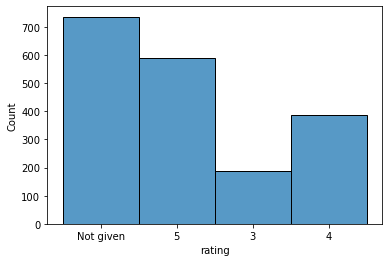

In [155]:
sns.histplot(data=df,x='rating')
plt.show()

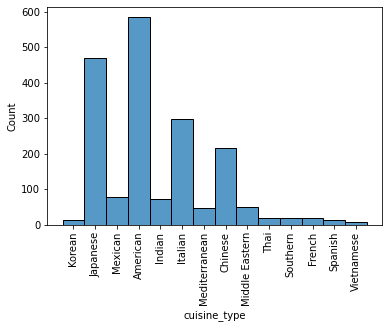

In [157]:
sns.histplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

What are your conclusions from the analysis?

According to the analyses, the company is not in good shape. Although it offers 14 different types of cuisines and has service available weekdays and weekends, 70.76% of orders are under $20. The average time of delivery and preparation of the dishes are 24.16 mins and 27 mins successively. If you look at the order and delivery time, it takes about 45 minutes in total for the customer to pick up his order. The company has to put in a lot more effort to manage the customer aspect because the majority of customers don't even rate the service. 



What recommendations would you like to share to help improve the business?

- First of all, have a better customer service (manage delivery time, preparation time)
- Ask customer to give feedbacks about services ( we will know that they think and what we can do to improve the service)


In [3]:
import numpy as np
np.random.seed(1)

vec1 = np.array([0, 0, 0])
mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T
assert sample_for_class1.shape == (3, 20), "The dimension of the sample_for_class1 matrix is not 3x20"

vec2 = np.array([1, 1, 1])
mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T
assert sample_for_class2.shape == (3, 20), "The dimension of the sample_for_class2 matrix is not 3x20"

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)
assert all_data.shape == (3, 40), "The dimension of the all_data matrix is not 3x20"
print(all_data)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208  0.24560206  0.70190716  2.13162939 -0.39649634
   1.16003707 -1.02220122  1.23009474  0.79924193  1.19829972  1.37756379
   2.19891788  0.36126959  0.65614632  1.69803203  1.40349164  1.16938243
   0.73378149  1.31515939  1.35054598 -0.61577235]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733  2.25286816  1.48851815  2.51981682 -0.44411381
   1.87616892  0.69379599  1.76201118  1.18656139  1.11900865  1.12182127
   1.18515642  1.42349435  1.04359686  0.55287144  1.59357852  1.74055645
   1.03261455  1.84616065 -0.31228341  2.12141771]
 [-0.528171

In [1]:
import scipy.stats as stats

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

from scipy.stats import binom

In [2]:
# Finding the p-value using the Binomial distribution
print("The p-value is", round(stats.binom_test(x = 39, n = 31000, p = 0.002, alternative = "less" ), 4))

The p-value is 0.0012


In [3]:
n = 31000

p = 0.002

k = np.arange(0, 200)

dist = [binom.pmf(i, n, p) for i in k]    # Probabilities, calculated using ~ Binom( 31000, 0.002 ), for each value of k

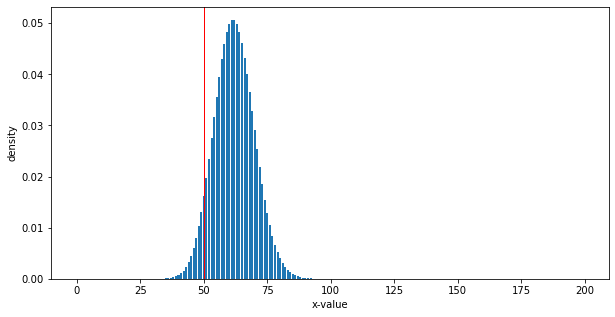

In [4]:
plt.figure(figsize = (10, 5))

plt.bar(k, dist)

plt.axvline(50, color = 'red', linestyle = '-', linewidth=1)

plt.xlabel("x-value")

plt.ylabel("density")

plt.show()

In [5]:
stat, pvalue = proportions_ztest(count = 39, nobs = 31000, value = 0.002, alternative = "smaller")

In [6]:
print("The p-value is", pvalue)

The p-value is 0.00011423176454888235


In [7]:
from time import time

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition

In [8]:
digits = datasets.load_digits(n_class = 6)    # Loading the data using the sklearn library

X = digits.data

y = digits.target

n_samples, n_features = X.shape

n_neighbors = 30

In [9]:
X.shape    # Printing the dimensions of X

(1083, 64)

In [1]:
!pip install pandas_datareader

In [2]:
import tqdm
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas_datareader.data as web

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Extracting list of S&P 500 companies using BeautifulSoup.
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip('\n')
    tickers.append(ticker)
    
tickers = [ticker.replace('.', '-') for ticker in tickers] # list of S&P 500 stocks

In [6]:
price_data = pd.read_csv('C:\\Users\\Vedalie Goudou\\Desktop\\Applied Data Science\\price_2020.csv', index_col=[0])

In [7]:
price_data.head()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,CEG,OGN
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,63.855606,8.113162,17.986767,NaN,9.61,39.143620,11.245819,22.385578,30.780001,31.271172,...,16.221039,23.216919,NaN,28.547478,37.990002,49.212429,21.089169,NaN,NaN,NaN
2011-01-03,64.218163,8.125947,17.952976,NaN,9.80,39.224346,11.318138,22.623722,31.290001,31.791464,...,16.227924,23.569420,NaN,28.570745,38.200001,50.395058,21.907326,NaN,NaN,NaN
2011-01-04,64.129395,8.100383,18.121916,NaN,9.80,38.966022,11.327178,22.608845,31.510000,31.676586,...,16.296804,23.665552,NaN,28.134232,37.840000,49.725819,21.550467,NaN,NaN,NaN
2011-01-05,64.129395,8.285738,18.121916,NaN,10.03,38.974094,11.110217,22.713020,32.220001,32.183357,...,16.200367,23.745670,NaN,28.268110,37.799999,49.762482,21.672325,NaN,NaN,NaN
2011-01-06,63.737186,8.289999,18.084377,NaN,10.05,39.119389,11.083097,23.583750,32.270000,32.433369,...,16.186602,24.146229,NaN,28.465996,37.480000,48.222305,21.611391,NaN,NaN,NaN


In [9]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 2010-12-31 to 2020-12-31
Columns: 505 entries, MMM to OGN
dtypes: float64(505)
memory usage: 9.7+ MB


In [10]:
price_data.describe()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,CEG,OGN
count,2518.000000,2518.000000,2518.000000,2015.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2320.000000,2518.000000,2518.000000,2518.000000,2518.000000,1994.000000,0.0,0.0
mean,129.500052,32.770849,46.444723,57.276296,123.081910,107.789455,36.281898,34.113940,143.081696,85.568949,...,34.882851,55.474184,47.508639,60.326381,107.043304,98.045064,30.111294,68.934349,NaN,NaN
std,43.221956,16.555322,23.071820,19.309089,115.215659,53.765677,22.964712,7.417566,124.003558,41.196759,...,15.009063,28.683313,21.298958,22.523191,76.508076,27.579190,10.685199,38.794829,NaN,NaN
min,53.467857,6.549759,17.111717,23.022469,9.490000,38.607128,9.571697,18.252689,22.690001,30.702240,...,15.353941,22.038038,20.060301,27.142870,28.610001,43.464252,11.924496,26.830307,NaN,NaN
25%,88.326887,17.244522,30.397619,42.209427,22.582500,63.976215,14.317582,27.508742,45.704999,51.329809,...,21.645175,34.189324,30.680713,43.280701,46.077499,74.103186,21.834126,40.771591,NaN,NaN
50%,134.066010,33.470402,38.734127,51.427849,90.290001,93.997112,32.911253,36.261847,89.119999,75.458969,...,30.424567,43.072651,40.645161,53.135380,78.595001,103.653469,26.167042,51.700823,NaN,NaN
75%,162.052372,46.543040,59.384840,75.791279,190.660000,149.989868,55.494214,39.247855,238.344997,123.202314,...,43.555832,69.835562,67.728615,77.995613,152.117504,117.136814,40.107069,90.269989,NaN,NaN
max,227.755096,63.032276,112.282272,102.631187,449.750000,262.319092,92.402596,50.280838,533.799988,175.898727,...,72.188370,152.110001,100.827866,114.538673,384.329987,158.105804,53.566162,173.116562,NaN,NaN


In [14]:
price_data.isnull().sum()

MMM        0
AOS        0
ABT        0
ABBV     503
ABMD       0
        ... 
ZBH        0
ZION       0
ZTS      524
CEG     2518
OGN     2518
Length: 505, dtype: int64

Missing Data due to Index Rebalancing

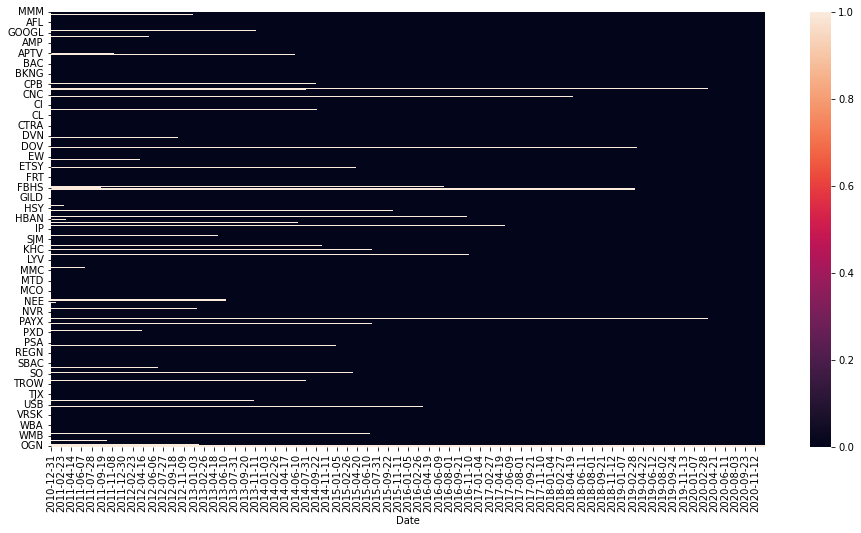

In [15]:
figure = plt.figure(figsize=(16, 8))
sns.heatmap(price_data.T.isnull());

In [1]:
import pandas as pd
# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
 'Location' : ["New York", "Paris", "Berlin", "London"],
 'Age' : [24, 13, 53, 33]
 }
data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [2]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [11]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [12]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [14]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [15]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)

In [17]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [18]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
import numpy as np

In [25]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [26]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [27]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [29]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
